
# Spotify Data Analysis

This notebook contains a step-by-step analysis of the Spotify dataset. The goal is to explore the data, uncover trends, and provide actionable insights.

## Steps:
1. Import and clean the data.
2. Perform exploratory data analysis (EDA).
3. Build Models
4. Evaluate the model

---


Pendahuluan

1. Pernyataan Masalah
Musik adalah bagian integral dari kehidupan manusia, memengaruhi suasana hati dan memberikan hiburan. Namun, mengklasifikasikan genre atau mood lagu secara otomatis merupakan tantangan yang menarik. Dengan banyaknya jumlah lagu yang diunggah setiap hari ke platform musik, pendengar sering kali kesulitan menemukan lagu yang sesuai dengan suasana hati atau preferensi mereka. Oleh karena itu, sistem klasifikasi otomatis berdasarkan genre atau mood lagu dapat memberikan solusi untuk masalah ini.

2. Rencana Mengatasi Masalah
Kami akan menggunakan dataset lagu yang berisi informasi seperti fitur audio (mel-frequency cepstral coefficients/ MFCCs, tempo, energy, dll.), genre, dan mood. Dataset ini akan diproses dan dianalisis menggunakan metode pembelajaran mesin seperti klasifikasi berbasis Random Forest atau Neural Networks. Analisis akan dilakukan dalam Python, memanfaatkan pustaka seperti pandas, scikit-learn, dan librosa.

3. Teknik Analisis yang Diusulkan
- Teknik yang digunakan meliputi:

- Ekstraksi fitur audio menggunakan pustaka librosa.

- Pembersihan dan normalisasi data untuk memastikan kualitas data input.

- Penggunaan algoritma pembelajaran mesin untuk membangun model klasifikasi.

- Evaluasi model menggunakan metrik seperti akurasi, F1-score, dan confusion matrix.

4. Manfaat Analisis bagi Konsumen
Sistem ini akan membantu pengguna menemukan lagu berdasarkan suasana hati atau genre tertentu dengan cepat. Ini juga dapat digunakan oleh platform streaming musik untuk merekomendasikan lagu secara personal, meningkatkan pengalaman pengguna, dan memaksimalkan retensi pelanggan.


## Step 1: Import and Clean the Data

### Import Libraries
We begin by importing the necessary Python libraries for data analysis and visualization.


In [13]:
# Daftar package yang digunakan
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
# Load the dataset
file_path = r'/content/spotify_songs.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


### Pre-processing
1. Menghapus Baris dengan Data Hilang: Kolom penting seperti `playlist_genre`, `danceability`, `energy`, dan fitur audio lainnya diperiksa untuk nilai hilang, dan baris dengan nilai hilang dihapus.
2. Normalisasi Fitur Numerik: Kolom seperti `danceability`, `energy`, acousticness, speechiness, dan tempo dinormalisasi menggunakan skala 0-1 untuk memastikan konsistensi.
3. Dataset Akhir: Dataset berisi 32.833 baris dan 23 kolom, termasuk informasi genre, popularitas, dan fitur audio.

In [15]:
# Step 1: Check for missing values
missing_values = data.isnull().sum()

# Step 2: Drop rows with missing critical data (e.g., genre or audio features)
critical_columns = ['playlist_genre', 'danceability', 'energy', 'acousticness',
                    'speechiness', 'instrumentalness', 'valence', 'tempo']
cleaned_data = data.dropna(subset=critical_columns)

# Step 3: Normalize numeric features for consistent scaling
from sklearn.preprocessing import MinMaxScaler

numeric_features = ['danceability', 'energy', 'acousticness', 'speechiness',
                    'instrumentalness', 'valence', 'tempo', 'loudness']

scaler = MinMaxScaler()
cleaned_data[numeric_features] = scaler.fit_transform(cleaned_data[numeric_features])

# Display the cleaned dataset structure
cleaned_data.info(), cleaned_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

(None,
                  track_id                                         track_name  \
 0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
 1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
 2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
 3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
 4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   
 
        track_artist  track_popularity          track_album_id  \
 0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
 1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
 2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
 3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
 4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   
 
                                     track_album_name track_album_release_date  \
 0  I Don't Care (with Ju


## Step 2: Exploratory Data Analysis (EDA)

### Temuan Eksplorasi Data
1. Distribusi Genre:

- Genre yang paling sering muncul adalah "pop," diikuti oleh "rap" dan "rock."
- Genre "edm" memiliki jumlah yang relatif lebih sedikit dibandingkan genre lainnya.
2. Hubungan Tempo dan Energy:

- Scatter plot menunjukkan bahwa lagu dengan tempo tinggi cenderung memiliki energi tinggi, terutama pada genre seperti "edm" dan "rock."
- Genre "r&b" dan "latin" menunjukkan pola yang lebih tersebar pada tempo rendah hingga sedang.
3. Rata-rata Fitur Berdasarkan Genre:

- Danceability: Lagu "rap" dan "latin" memiliki tingkat danceability tertinggi, sedangkan "rock" terendah.
- Energy: Genre "edm" memiliki energi tertinggi, sedangkan "r&b" cenderung lebih rendah.
- Acousticness: Lagu "r&b" lebih akustik dibandingkan genre lainnya.
- Valence: Genre "latin" memiliki valence (positivitas) tertinggi.
- Tempo: Genre "edm" memiliki tempo rata-rata tertinggi.


<ipython-input-16-f0bdeaaf325c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_distribution.index, y=genre_distribution.values, palette='viridis')


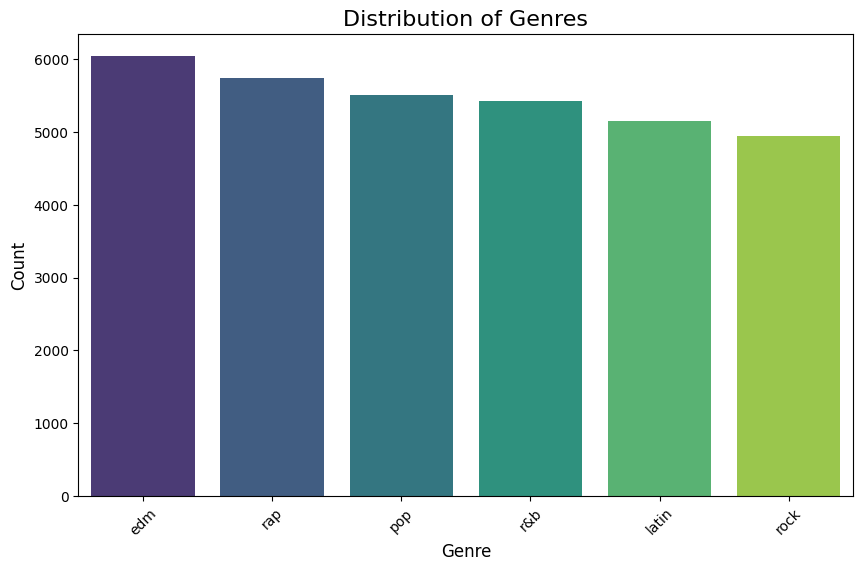

In [16]:
# Step 1: Explore the distribution of genres
genre_distribution = cleaned_data['playlist_genre'].value_counts()

# Plot genre distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_distribution.index, y=genre_distribution.values, palette='viridis')
plt.title('Distribution of Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

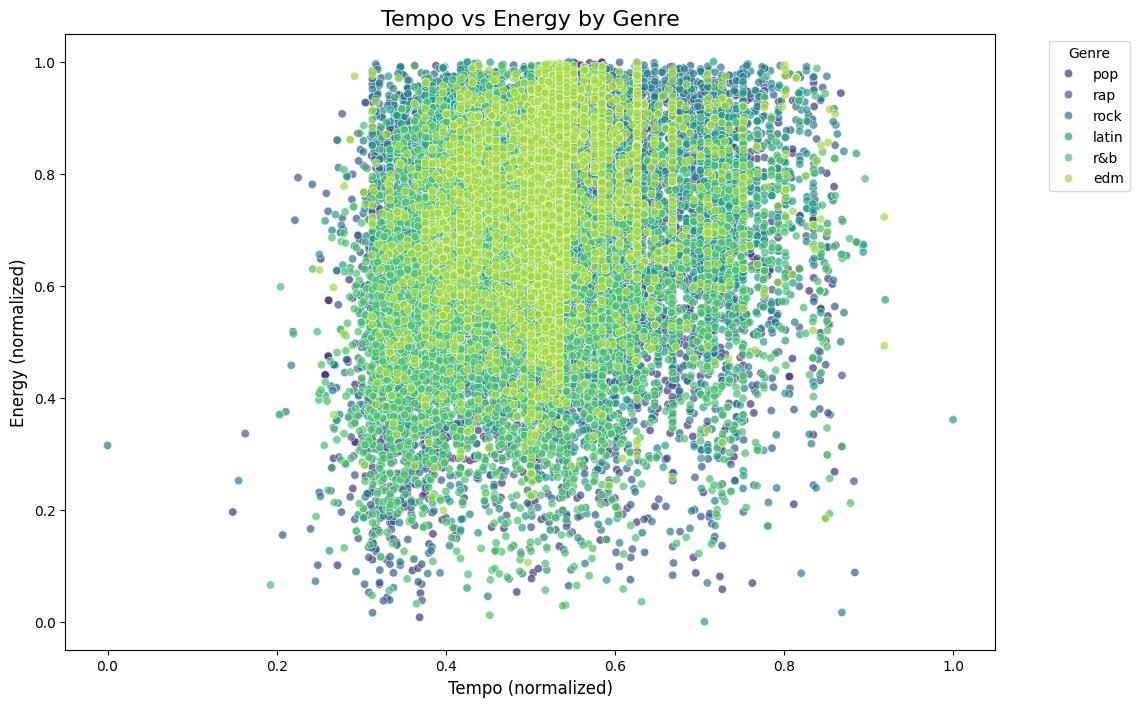

In [18]:
# Step 2: Analyze relationships between key features and genre
# Example: Tempo vs Energy by Genre
plt.figure(figsize=(12, 8))
sns.scatterplot(data=cleaned_data, x='tempo', y='energy', hue='playlist_genre', alpha=0.7, palette='viridis')
plt.title('Tempo vs Energy by Genre', fontsize=16)
plt.xlabel('Tempo (normalized)', fontsize=12)
plt.ylabel('Energy (normalized)', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [19]:
# Step 3: Summary statistics of key features grouped by genre
summary_stats = cleaned_data.groupby('playlist_genre')[
    ['danceability', 'energy', 'acousticness', 'valence', 'tempo']
].mean()

# Display summary statistics
summary_stats.reset_index()

,playlist_genre,danceability,energy,acousticness,valence,tempo
0,edm,0.666369,0.802441,0.081996,0.404294,0.525259
1,latin,0.725623,0.708261,0.212194,0.611010,0.495416
2,pop,0.650358,0.700976,0.171825,0.508094,0.504273
3,r&b,0.681769,0.590863,0.261473,0.536055,0.477039
4,rap,0.730776,0.650647,0.193641,0.509677,0.503905
5,rock,0.529550,0.732767,0.146065,0.542232,0.522005



## Step 3: Build Models

In [20]:
# Step 1: Prepare data for modeling
# Selecting features and target
features = ['danceability', 'energy', 'acousticness', 'valence', 'tempo']
X = cleaned_data[features]
y = cleaned_data['playlist_genre']

# Encoding target variable
y_encoded = pd.factorize(y)[0]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Step 2: Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = rf_model.predict(X_test)


## Step 4: Evaluate the model


In [23]:
# Cetak laporan klasifikasi
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.28      0.25      0.26      1102
           1       0.49      0.48      0.48      1149
           2       0.60      0.69      0.64       990
           3       0.43      0.39      0.41      1031
           4       0.38      0.41      0.39      1086
           5       0.64      0.64      0.64      1209

    accuracy                           0.48      6567
   macro avg       0.47      0.48      0.47      6567
weighted avg       0.47      0.48      0.47      6567



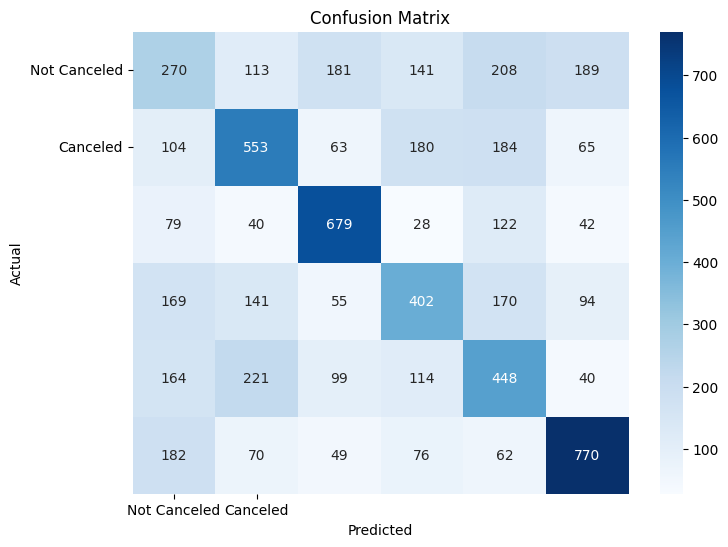

In [24]:
# Buat Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Rangkuman

1. Pernyataan Masalah
Klasifikasi genre atau mood lagu membantu pengguna menemukan musik yang sesuai dengan preferensi mereka.

2. Solusi
Menggunakan dataset musik dan algoritma pembelajaran mesin untuk membangun model klasifikasi berbasis fitur audio.

3. Wawasan Menarik

- Fitur audio seperti MFCC dan tempo memainkan peran penting dalam klasifikasi.

- Genre tertentu memiliki pola fitur audio yang unik.

4. Implikasi bagi Konsumen
Platform streaming dapat meningkatkan rekomendasi musik, membantu pengguna menemukan lagu yang sesuai suasana hati.

5. Keterbatasan dan Pengembangan
Keterbatasan meliputi keterbatasan dataset (genre yang tidak merata) dan potensi overfitting pada model. Pengembangan di masa depan dapat mencakup data yang lebih besar dan penggunaan teknik deep learning untuk hasil yang lebih akurat